<h2 align='center'>Principal Component Analysis Tutorial</h2>

In [1]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [18]:
dataset.data.shape

(1797, 64)

In [21]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

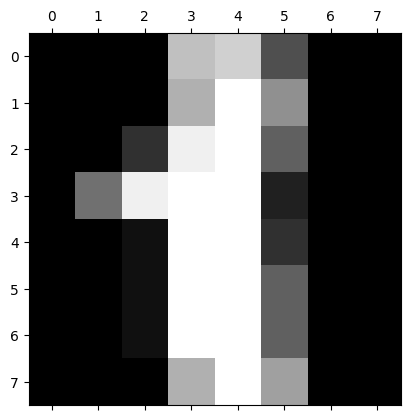

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[1].reshape(8,8))
plt.show()

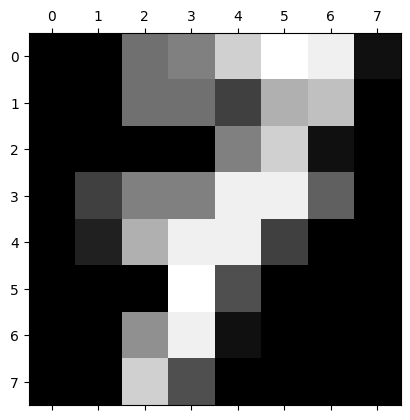

In [31]:
plt.matshow(dataset.data[7].reshape(8,8))

In [16]:
dataset.target[:5]

array([0, 1, 2, 3, 4])

In [23]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [24]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
import pandas as pd
import numpy as np

def summary(df):
    print(f'data shape: {df.shape}')
    
    # Initialize summary DataFrame
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    
    # Calculate missing values
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    
    # Calculate number of unique values
    summ['#unique'] = df.nunique().values
    
    # Describe the DataFrame and transpose it
    desc = df.describe(include='all').transpose()
    
    # Add descriptive statistics
    summ['count'] = desc['count']
    summ['mean'] = desc['mean']
    summ['std'] = desc['std']
    summ['min'] = desc['min']
    summ['25%'] = desc['25%']
    summ['50%'] = desc['50%']
    summ['75%'] = desc['75%']
    summ['max'] = desc['max']
    
    # Handle categorical data
    if 'top' in desc:
        summ['top'] = desc['top']
        summ['freq'] = desc['freq']
    else:
        summ['top'] = np.nan
        summ['freq'] = np.nan
    
    # Adding first few values from the DataFrame
    for i in range(min(3, len(df))):
        summ[f'value_{i+1}'] = df.iloc[i].values

    # Handling different data types for statistical calculations
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            summ.loc[col, 'median'] = df[col].median()
            summ.loc[col, 'skew'] = df[col].skew()
            summ.loc[col, 'kurtosis'] = df[col].kurtosis()
        else:
            summ.loc[col, 'median'] = np.nan
            summ.loc[col, 'skew'] = np.nan
            summ.loc[col, 'kurtosis'] = np.nan
    
    return summ.style.background_gradient(cmap='YlOrBr')

import warnings
warnings.filterwarnings('ignore')
summary(df)

In [ ]:
df.describe()

In [36]:
df.shape

(1797, 64)

In [28]:
X = df
y = dataset.target

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

<h3>Use PCA to reduce dimensions</h3>

In [34]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


<h4>Use components such that 95% of variance is retained</h4>

In [60]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 41)

In [62]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 , 0.00428888,
       0.00373606, 0.00353274, 0.00336684, 0.0032803 , 0.00308321,
       0.00293779, 0.00256589, 0.00227742, 0.00222278, 0.0021143 ,
       0.00189909])

In [63]:
pca.n_components_

41

**PCA created 29 components out of 64 original columns**

In [64]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   1.08888322,
          0.20600401,   1.70451133],
       [  7.9576113 , -20.76869896,   4.43950604, ...,  -0.23084624,
          0.72235399,  -1.55237711],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   1.10865156,
          3.28518278,   1.4500428 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,   0.37578193,
         -0.9818292 ,   0.51979675],
       [ -4.87210009,  12.42395362, -10.17086635, ...,  -0.78944476,
          0.5900548 ,  -0.71021627],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -1.00343207,
          4.88385573,  -0.31475873]])

In [65]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
print(len(X_train_pca),len(X_test_pca))

1437 360


In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

**Let's now select only two components**

In [67]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [68]:
X_pca

array([[ -1.25946752,  21.27487948],
       [  7.95760735, -20.76869771],
       [  6.99192589,  -9.95598318],
       ...,
       [ 10.80128737,  -6.96025956],
       [ -4.87210488,  12.42395986],
       [ -0.34438211,   6.36554119]])

In [69]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

**You can see that both combined retains 0.14+0.13=0.27 or 27% of important feature information**

In [70]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

We get less accuancy (~60%) as using only 2 components did not retain much of the feature information. However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy

In [72]:
a=1
b=2
a==b

False

: 